## Практикуемся решать задачу регрессии!

### Будем предсказывать цену дома 📝

ВАЖНО: При построении графиков не забывайте указать название графика и обозначить, что изображено по каждой из осей

В блоке ниже импортируйте все библиотеки, которые вам понадобятся для запуска ноутбука

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# some lib

data**Скачайте необходимые данные по ссылке: https://www.kaggle.com/c/house-prices-advanced-regression-techniques**

In [2]:
df = pd.read_csv('train.csv', header=0)

✅ Посмотрите, как выглядят данные, и приступайте к анализу

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


✅ Если в данных бессмысленные столбцы? Если да, избавьтесь от них и объясните, почему так поступили.

In [4]:
df = df.drop(columns=['Id'], axis = 1)

In [5]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


✅ Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [6]:
df.shape

(1460, 80)

In [7]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [8]:
df.isnull().sum() / df.shape[0]

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 80, dtype: float64

***можно сказать, что в данных много пропусков, поэтому удалим столбцы, в которых пропусков больше 10% (или близко к 10%)***

In [9]:
df = df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType', 'FireplaceQu', 'LotFrontage'], axis = 1)

In [10]:
df.isnull().sum() / df.shape[0]

MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 73, dtype: float64

✅ Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. 

In [11]:
# MasVnrArea это площадь облицовки каменной кладкой в квадратных футах, поэтому если значение NaN то скорее всего облицовки нет, поэтому заменим на 0
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
# BsmtQual и остальные признаки с Bsmt это характеристики подвала, поэтому если значение NaN то скорее всего подвала нет, поэтому заменим на 0
df['BsmtQual'] = df['BsmtQual'].fillna(0)
df['BsmtCond'] = df['BsmtCond'].fillna(0)
df['BsmtExposure'] = df['BsmtExposure'].fillna(0)
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(0)
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(0)
# GarageType и остальные признаки с Garage это характеристики гаража, поэтому если значение NaN то скорее всего гаража нет, поэтому заменим на 0
df['GarageType'] = df['GarageType'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageFinish'] = df['GarageFinish'].fillna(0)
df['GarageQual'] = df['GarageQual'].fillna(0)
df['GarageCond'] = df['GarageCond'].fillna(0)

✅ Проверьте, что вы действительно избавились от пропусков

In [12]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 73, dtype: int64

In [13]:
df[['Electrical', 'SalePrice']].groupby('Electrical').mean()

,SalePrice
Electrical,
FuseA,122196.893617
FuseF,107675.444444
FuseP,97333.333333
Mix,67000.000000
SBrkr,186825.113193


In [14]:
df['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

***По параметру Electrical можно хорошо предсказать цену дома, поэтому в реальной задаче лучше удалить эту строку, так как она всего 1, но так как нужно сделать предсказания для каждого дома, то заменим на самое часто встречающееся значение***

In [15]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [16]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 73, dtype: int64

In [17]:
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


✅ Обработайте категориальные признаки. Объясните выбор метода (one-hot-encoding, label encoding, ...)

In [18]:
# используем one-hot-encoding, так как это позволит нам не вводить порядок в категориальные признаки
df = pd.get_dummies(df).astype(int)

In [19]:
df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,20,13175,6,6,1978,1988,119,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,70,9042,7,9,1941,2006,0,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,20,9717,5,6,1950,1996,0,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


✅ Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

In [20]:
df.corr()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotArea,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,...,-0.019779,-0.156175,-0.050663,0.163684,-0.046367,-0.038888,-0.033444,-0.023873,0.161642,-0.151659
YearBuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,...,-0.023431,0.346954,0.012122,-0.238463,-0.110233,-0.045601,-0.010104,-0.035785,-0.158427,0.343895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.016241,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011783,-0.014874,-0.015130,-0.034618,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,0.030002,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.013748,0.021369,-0.026277,-0.059130,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.000983,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009535,0.000765,-0.007929,0.021534,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.024359,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.081539,-0.019560,0.041207,-0.153930,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


✅ Найдите признаки с максимальным и минимальным абсолютным значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

In [21]:
min_max_corr = df.corr()['SalePrice'].sort_values(ascending=False)
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice            1.000000
OverallQual          0.790982
GrLivArea            0.708624
GarageCars           0.640409
GarageArea           0.623431
                       ...   
GarageType_Detchd   -0.354141
GarageFinish_Unf    -0.410608
BsmtQual_TA         -0.452394
KitchenQual_TA      -0.519298
ExterQual_TA        -0.589044
Name: SalePrice, Length: 275, dtype: float64

In [22]:
max_corr_feature = df.corr()['SalePrice'].sort_values(ascending=False).index[1]
min_corr_feature = df.corr()['SalePrice'].sort_values(ascending=False).index[-1]
print(f"Признак с максимальной корреляцией: {max_corr_feature} ({min_max_corr[max_corr_feature]})")
print(f"Признак с минимальной корреляцией: {min_corr_feature} ({min_max_corr[min_corr_feature]})")

Признак с максимальной корреляцией: OverallQual (0.7909816005838053)
Признак с минимальной корреляцией: ExterQual_TA (-0.5890435234097585)


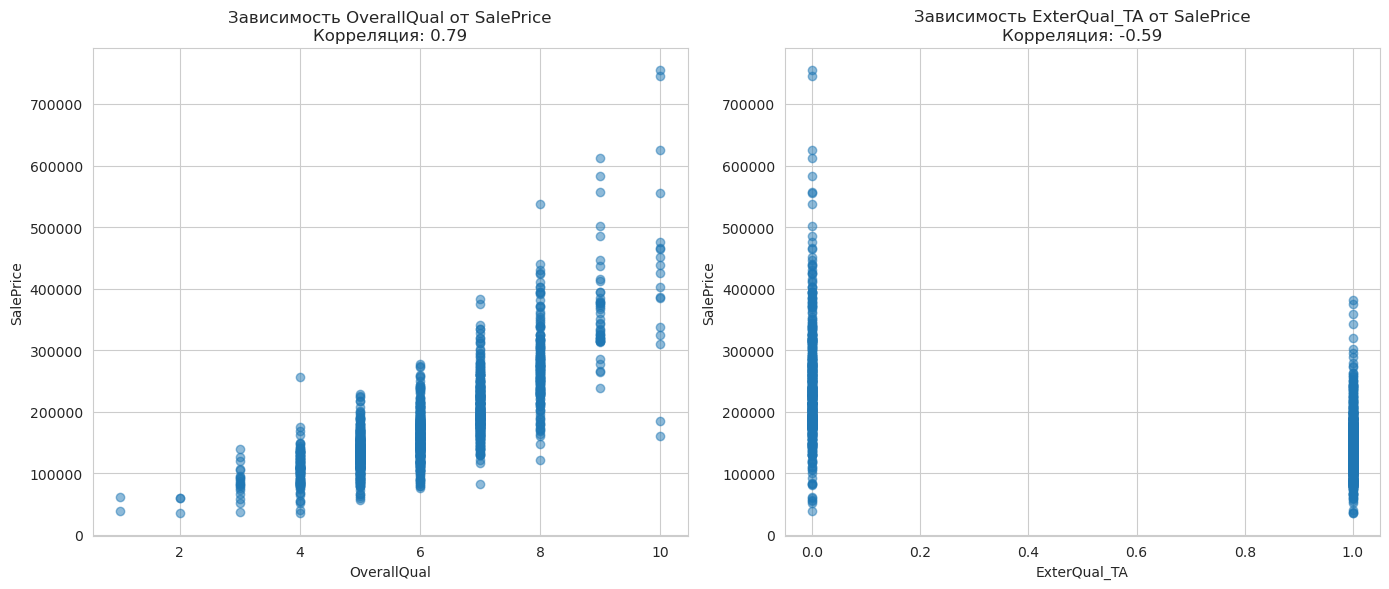

In [23]:
plt.figure(figsize=(14, 6))
# График для признака с максимальной корреляцией
plt.subplot(1, 2, 1)
plt.scatter(x = df[max_corr_feature], y = df['SalePrice'], alpha=0.5)
plt.title(f'Зависимость {max_corr_feature} от SalePrice\nКорреляция: {min_max_corr[max_corr_feature]:.2f}')
plt.xlabel(max_corr_feature)
plt.ylabel('SalePrice')

# График для признака с минимальной корреляцией
plt.subplot(1, 2, 2)
plt.scatter(x = df[min_corr_feature], y = df['SalePrice'], alpha=0.5)
plt.title(f'Зависимость {min_corr_feature} от SalePrice\nКорреляция: {min_max_corr[min_corr_feature]:.2f}')
plt.xlabel(min_corr_feature)
plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

✅ Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также "смещения" распределения переменной в сторону нормального, можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). 

Подсказка: воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

ВАЖНО: далее используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.

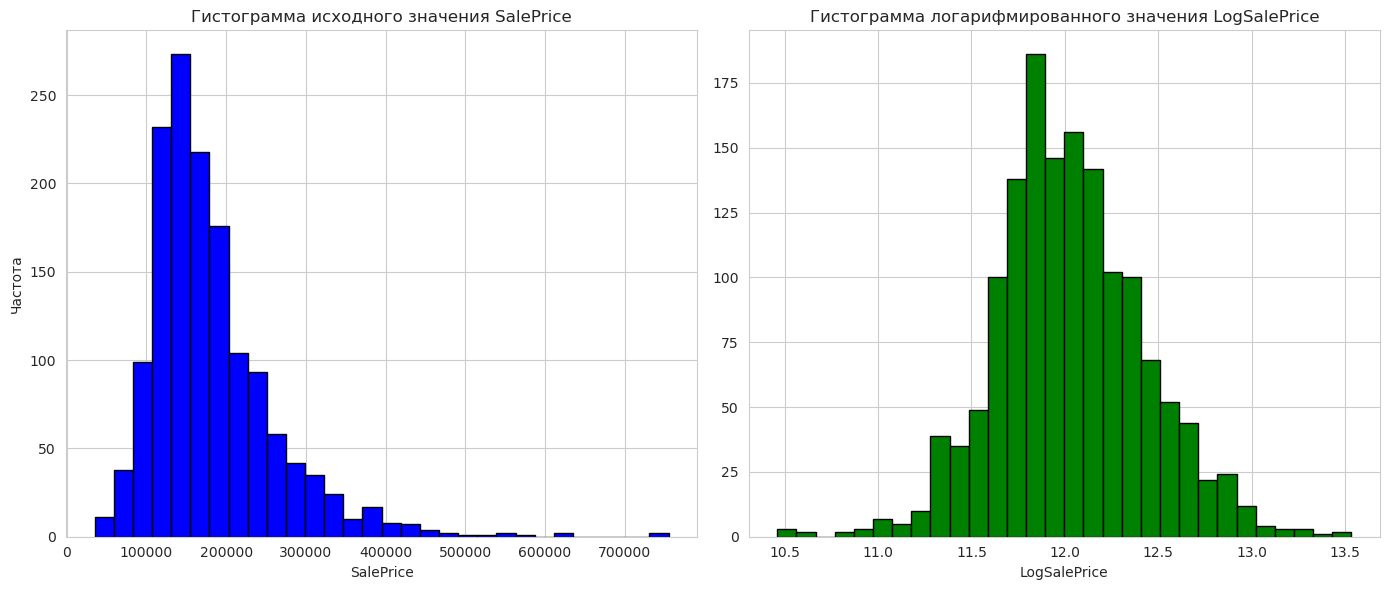

In [24]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df['SalePrice'], bins=30, color='blue', edgecolor='black')
plt.title('Гистограмма исходного значения SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Частота')

# применяем логарифмирование
df['LogSalePrice'] = np.log1p(df['SalePrice'])

plt.subplot(1, 2, 2)
plt.hist(df['LogSalePrice'], bins=30, color='green', edgecolor='black')
plt.title('Гистограмма логарифмированного значения LogSalePrice')
plt.xlabel('LogSalePrice')

plt.tight_layout()
plt.show()

✅ Разбейте выборку на обучающую и тестовую в отношении 75:25. Зафиксируйте при разбиении значение `random_state` = 13. Не забывайте прологорифмировать целевую переменную (как в предыдущем задании)

In [25]:
from sklearn.model_selection import train_test_split
# удалим не прологарифмированный SalePrice, так как он больше не нужен, но сохраним его в отедельный series на всякий случай
SalePrice = df['SalePrice']
df = df.drop(columns=['SalePrice'], axis=1)

In [26]:
# определим признаки и целевую переменную
X = df.drop(columns=['LogSalePrice'], axis=1)
y = df['LogSalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
print(f"Размер обучающей выборки: {X_train.shape}, Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (1095, 274), Размер тестовой выборки: (365, 274)


✅ Примените к данным 

- Линейную регрессию
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрикам 
- RMSE 
- MAE
- $R^2$

Опишите полученные результаты.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

In [28]:
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()

lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
lasso = lasso_grid.best_estimator_

ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
ridge = ridge_grid.best_estimator_

lr.fit(X_train, y_train)

models = {'Linear Regression': lr, 'Lasso': lasso, 'Ridge': ridge}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Модель: {name}")
    print(f"RMSE: {root_mean_squared_error(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"R^2: {r2_score(y_test, y_pred)}")
    print("\n")

Модель: Linear Regression
RMSE: 3884.5465820114005
MAE: 560.5563515680564
R^2: -91400815.83024757


Модель: Lasso
RMSE: 0.23736298445361145
MAE: 0.10859110164758976
R^2: 0.658732133565678


Модель: Ridge
RMSE: 0.2135789922006712
MAE: 0.09734470048941822
R^2: 0.723696443322805




***Модель Ridge показала наилучшие результаты среди всех трех моделей. Это может быть связано с тем, что Ridge также использует регуляризацию, но, в отличие от Lasso, она не отбрасывает признаки полностью, что может быть полезно, если все признаки в некоторой степени важны.***

✅ Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения, проанализируйте результаты.

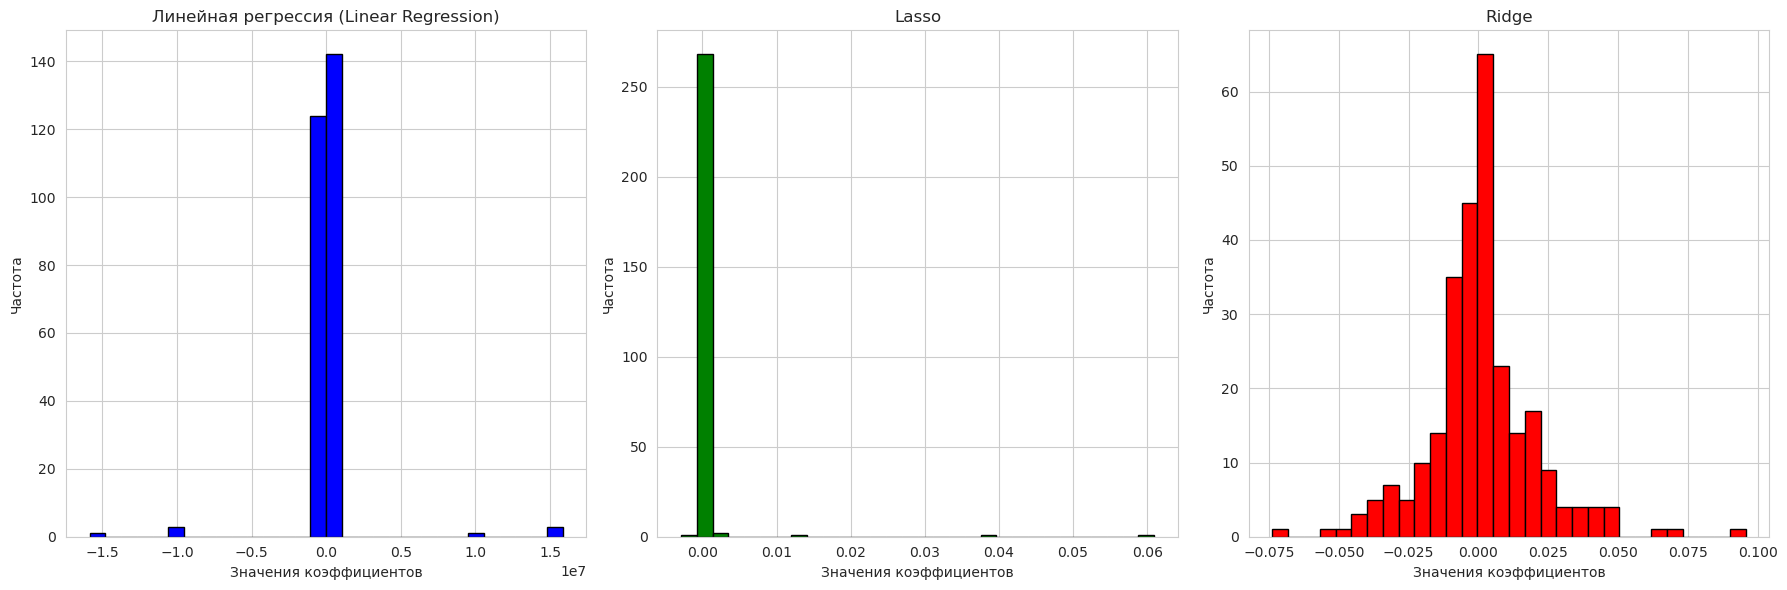

In [29]:
coefficients_lr = lr.coef_
coefficients_lasso = lasso.coef_
coefficients_ridge = ridge.coef_

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(coefficients_lr, bins=30, color='blue', edgecolor='black')
plt.title('Линейная регрессия (Linear Regression)')
plt.xlabel('Значения коэффициентов')
plt.ylabel('Частота')

plt.subplot(1, 3, 2)
plt.hist(coefficients_lasso, bins=30, color='green', edgecolor='black')
plt.title('Lasso')
plt.xlabel('Значения коэффициентов')
plt.ylabel('Частота')

plt.subplot(1, 3, 3)
plt.hist(coefficients_ridge, bins=30, color='red', edgecolor='black')
plt.title('Ridge')
plt.xlabel('Значения коэффициентов')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

## Анализ гистограмм коэффициентов моделей

### 1. **Линейная регрессия (Linear Regression):**
   - **Распределение коэффициентов:** Большая часть коэффициентов сосредоточена около нуля, но видно, что несколько коэффициентов имеют экстремальные значения (как положительные, так и отрицательные), причем в масштабе до 1e7.
   - **Интерпретация:** Это может указывать на то, что модель подвержена переобучению, особенно в случае мультиколлинеарности, когда признаки сильно коррелируют друг с другом. Высокие значения коэффициентов могут быть результатом попытки модели компенсировать эти корреляции. Такое поведение может ухудшать способность модели к обобщению на новых данных.

### 2. **Lasso:**
   - **Распределение коэффициентов:** Почти все коэффициенты равны нулю, за исключением нескольких малозначимых коэффициентов, которые близки к нулю.
   - **Интерпретация:** Lasso использует L1-регуляризацию, которая склонна занулять часть весов. Этот эффект особенно полезен для отбора признаков, что делает модель более простой и интерпретируемой. В данной модели Lasso подавила большинство признаков, оставив только те, которые имеют наибольшее влияние на целевую переменную.

### 3. **Ridge:**
   - **Распределение коэффициентов:** Коэффициенты имеют более плотное распределение вокруг нуля по сравнению с линейной регрессией. Нет явных выбросов, как в случае с линейной регрессией, и значения коэффициентов более сглажены.
   - **Интерпретация:** Ridge использует L2-регуляризацию, которая предотвращает большие значения коэффициентов, равномерно "сжимая" их. Это помогает снизить влияние признаков с высоким уровнем мультиколлинеарности, сохраняя все признаки в модели. Ridge хорошо справляется с задачей стабилизации модели, особенно при наличии коррелированных признаков.

### Общие выводы:
- **Линейная регрессия:** Без регуляризации эта модель может давать экстремальные значения коэффициентов, что может привести к переобучению и плохой обобщающей способности на новых данных.
- **Lasso:** Данная модель эффективно отобрала несколько значимых признаков, обнулив остальные. Это делает модель интерпретируемой и может быть полезно, если важно сократить количество признаков.
- **Ridge:** Модель Ridge показала наиболее сбалансированное распределение коэффициентов, избегая экстремальных значений и сохраняя все признаки в модели. Эта модель лучше всего справляется с задачей уменьшения переобучения за счет "сжатия" коэффициентов, что может сделать ее предпочтительным выбором при наличии множества коррелированных признаков.

### P.S:
- При использовании *One-Hot Encoding* я не использовал параметр `drop_first=True`, поэтому модель `lr` - линейная регрессия, могла столкнуться с проблемой мультиколлинеарности, что могло повлиять на результаты. В будущем можно попробовать использовать `drop_first=True` и сравнить результаты.
